In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from xgboost import XGBRegressor

In [2]:
calories = pd.read_csv('/content/calories.csv')
exercise = pd.read_csv('/content/exercise.csv')
calories.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [3]:
exercise.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [6]:
#concatenating both the dataset
dataset = pd.concat([exercise, calories['Calories']], axis=1)
dataset.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [7]:
dataset.shape


(15000, 9)

In [8]:
dataset.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


In [9]:
dataset.isnull().sum()

,0
User_ID,0
Gender,0
Age,0
Height,0
Weight,0
Duration,0
Heart_Rate,0
Body_Temp,0
Calories,0


In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


Data visualization


In [11]:
sns.set()


<Axes: xlabel='Gender', ylabel='count'>

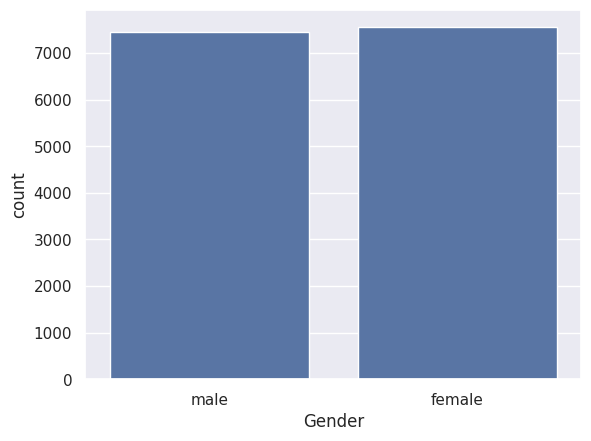

In [13]:
#plotting the distribution of gender column
sns.countplot(x='Gender', data = dataset)

<ipython-input-12-2e9b77331873>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['Age'])


<Axes: xlabel='Age', ylabel='Density'>

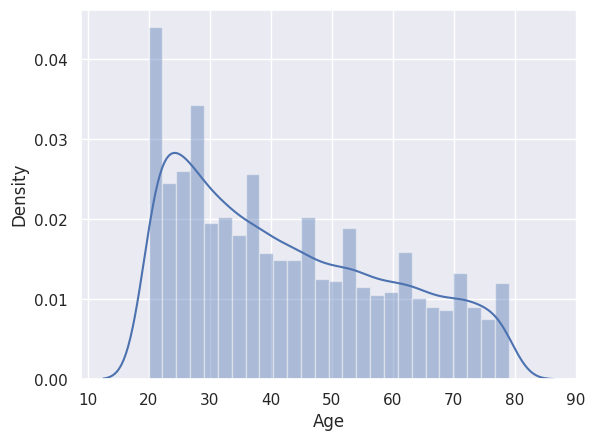

In [12]:
#plotting the distribution of age column
sns.distplot(dataset['Age'])

<ipython-input-14-adab414f4677>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['Height'])


<Axes: xlabel='Height', ylabel='Density'>

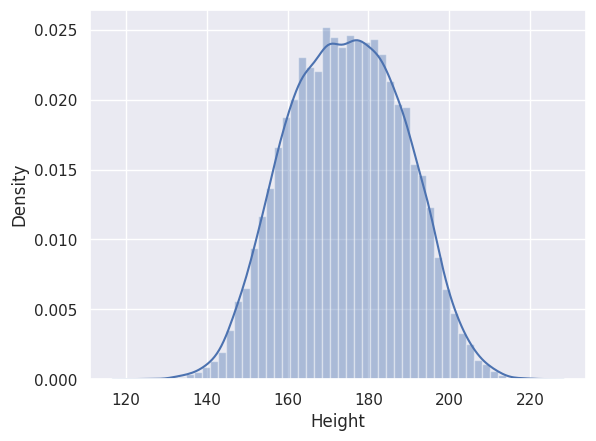

In [14]:
#plotting the distribution of height column
sns.distplot(dataset['Height'])

<ipython-input-16-ee7be4ed35c9>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset ['Weight'])


<Axes: xlabel='Weight', ylabel='Density'>

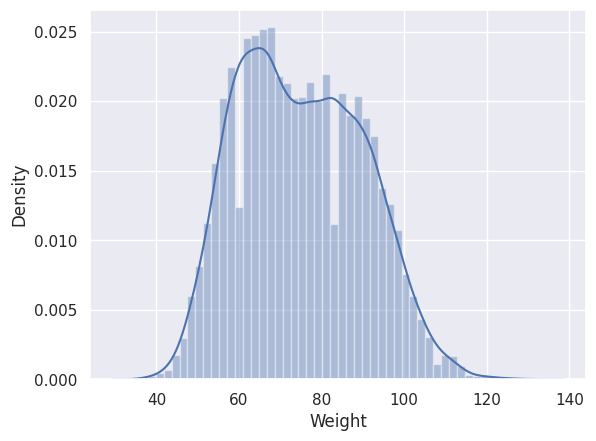

In [16]:
#plotting the distribution of weight column
sns.distplot(dataset ['Weight'])

<ipython-input-18-fdbf93e7ef0d>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['Duration'])


<Axes: xlabel='Duration', ylabel='Density'>

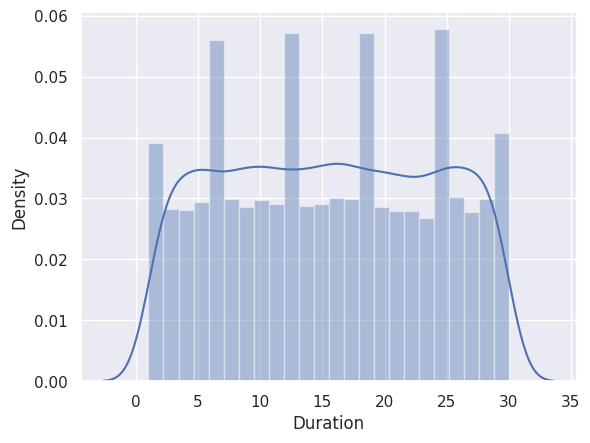

In [18]:
#plotting the distribution of duration
sns.distplot(dataset['Duration'])

<ipython-input-21-1b15a6215901>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['Calories'])


<Axes: xlabel='Calories', ylabel='Density'>

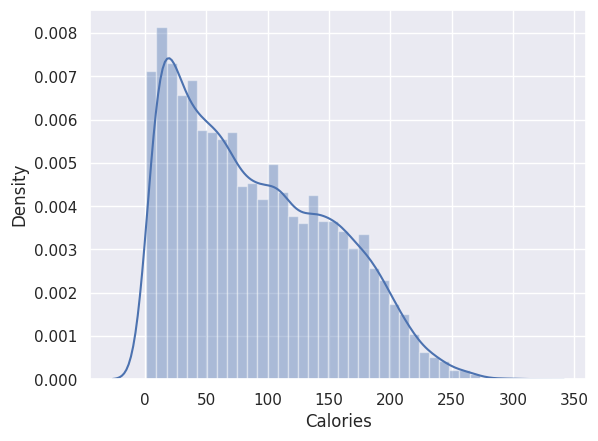

In [21]:
#plotting the distribution of calories
sns.distplot(dataset['Calories'])

In [24]:
#encoding gender column into numeric form
dataset.replace({"Gender": {'male':0, 'female' : 1}}, inplace = True)

<ipython-input-24-d424a7ef1dc3>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset.replace({"Gender": {'male':0, 'female' : 1}}, inplace = True)


In [26]:
dataset.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,0,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,1,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,0,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,1,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,1,27,154.0,58.0,10.0,81.0,39.8,35.0


finding the correlation

In [25]:
correlation = dataset.corr()

<Axes: >

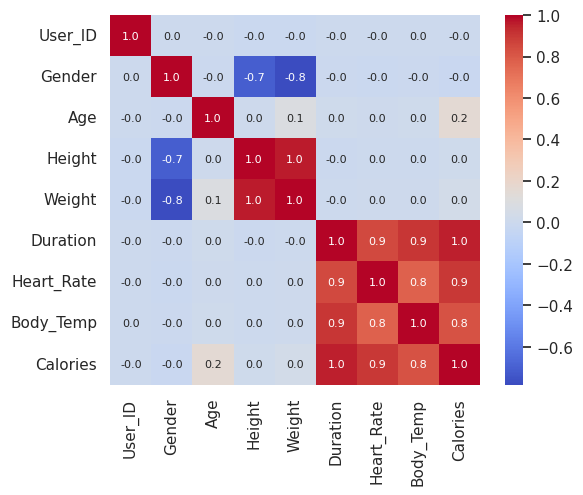

In [28]:
#constructing the heatmap for understanding the correlation
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='coolwarm')


separating the features and target

In [30]:
X = dataset.drop(columns=['Calories', 'User_ID'], axis =1)
y = dataset['Calories']

In [31]:
print(X)

       Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
0           0   68   190.0    94.0      29.0       105.0       40.8
1           1   20   166.0    60.0      14.0        94.0       40.3
2           0   69   179.0    79.0       5.0        88.0       38.7
3           1   34   179.0    71.0      13.0       100.0       40.5
4           1   27   154.0    58.0      10.0        81.0       39.8
...       ...  ...     ...     ...       ...         ...        ...
14995       1   20   193.0    86.0      11.0        92.0       40.4
14996       1   27   165.0    65.0       6.0        85.0       39.2
14997       1   43   159.0    58.0      16.0        90.0       40.1
14998       0   78   193.0    97.0       2.0        84.0       38.3
14999       0   63   173.0    79.0      18.0        92.0       40.5

[15000 rows x 7 columns]


In [32]:
print(y)

0        231.0
1         66.0
2         26.0
3         71.0
4         35.0
         ...  
14995     45.0
14996     23.0
14997     75.0
14998     11.0
14999     98.0
Name: Calories, Length: 15000, dtype: float64


Splitting the dataset into train and test data

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [34]:
X_train

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
9839,0,37,179.0,77.0,7.0,81.0,39.5
9680,0,23,195.0,87.0,26.0,110.0,40.5
7093,0,33,181.0,77.0,12.0,88.0,40.1
11293,1,66,156.0,54.0,9.0,77.0,39.5
820,1,32,144.0,49.0,5.0,90.0,39.0
...,...,...,...,...,...,...,...
5191,1,75,148.0,51.0,22.0,104.0,40.6
13418,1,21,172.0,67.0,20.0,104.0,40.7
5390,0,57,189.0,92.0,8.0,90.0,39.5
860,0,35,174.0,76.0,12.0,97.0,40.2


In [35]:
X_test

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
11499,1,45,154.0,52.0,26.0,107.0,40.6
6475,0,21,187.0,90.0,29.0,111.0,40.5
13167,0,58,176.0,77.0,11.0,90.0,40.0
862,0,35,182.0,89.0,24.0,108.0,40.8
5970,1,67,171.0,67.0,29.0,116.0,41.1
...,...,...,...,...,...,...,...
6216,1,61,166.0,66.0,28.0,106.0,41.0
3585,1,73,165.0,66.0,10.0,92.0,40.0
10023,1,38,169.0,66.0,20.0,104.0,40.2
14044,1,25,163.0,54.0,5.0,86.0,39.2


In [36]:
y_train

,Calories
9839,17.0
9680,167.0
7093,40.0
11293,34.0
820,23.0
...,...
5191,151.0
13418,114.0
5390,41.0
860,57.0


In [37]:
y_test

,Calories
11499,173.0
6475,189.0
13167,53.0
862,161.0
5970,226.0
...,...
6216,186.0
3585,53.0
10023,120.0
14044,20.0


Training the model - XGBRegressor

In [38]:
model = XGBRegressor()

In [39]:
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

Evaluation of the model

> it is a regression problem so we are going to evaluate on the basis of mean absolute error and RMSE







In [42]:
#predict on test data
model_prediction  = model.predict(X_test)
model_prediction

array([172.07645 , 195.7858  ,  51.708874, ..., 121.50776 ,  19.239851,
       214.43597 ], dtype=float32)

MEAN ABSOLUTE ERROR

In [43]:
mae = metrics.mean_absolute_error(y_test, model_prediction)
mae

1.4981198125282924

MSE - mean squared error

In [48]:
mse = metrics.mean_squared_error(y_test, model_prediction)
mse

4.568956111227719

In [49]:
rmse = metrics.root_mean_squared_error(y_test, model_prediction)
rmse

2.1375116634132594

Checking for R squared

In [50]:
r2score = metrics.r2_score(y_test, model_prediction)
r2score


0.9988678909361673

In [51]:
import joblib
joblib.dump(model, 'calories_model.pkl')

['calories_model.pkl']